In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [18]:
df = pd.read_csv("C://Users//Manisha Chandanshiv//OneDrive//ドキュメント//Excelr assignment Questions//Data Science//Decision Tree//decission tree my.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


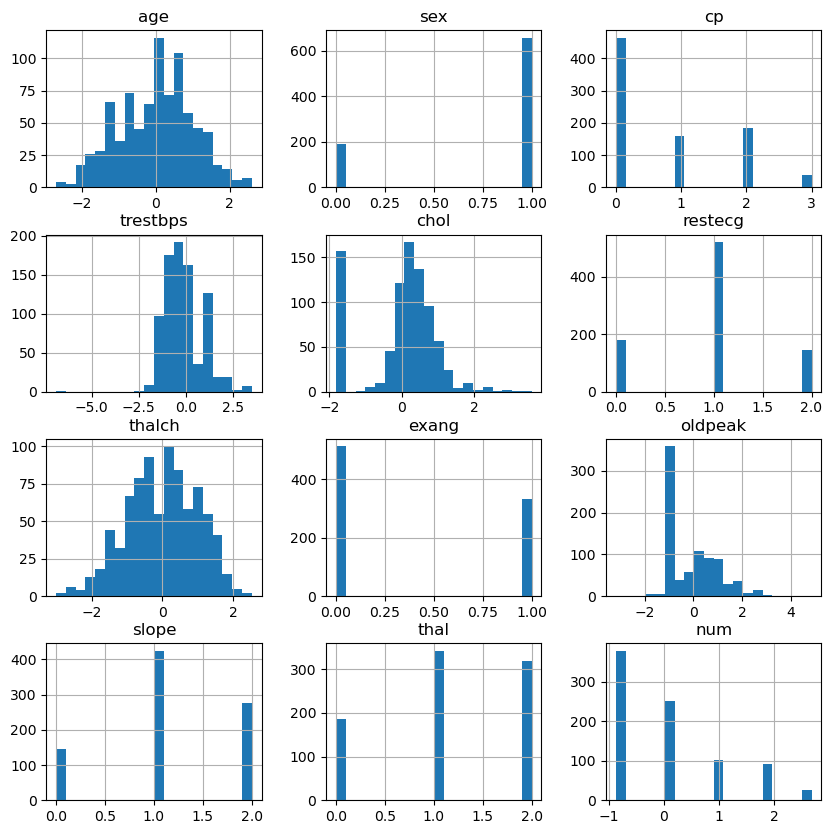

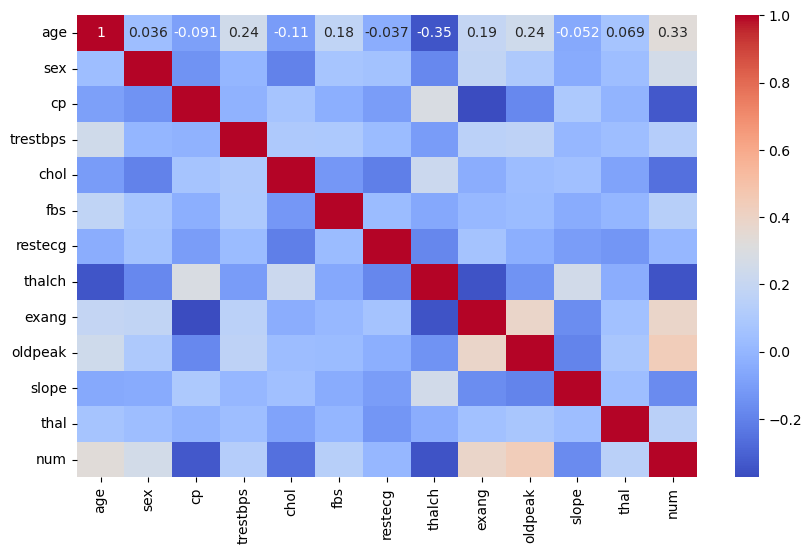

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of features
df.hist(bins=20, figsize=(10, 10))
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [34]:
# Handling categorical variables and encoding (if necessary)
# Assuming 'sex' and 'cp' are categorical columns, we can use Label Encoding
df['sex'] = df['sex'].map({1: 'Male', 0: 'Female'})
df['cp'] = df['cp'].map({0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'})

# Convert categorical features into numerical format (Label Encoding if required)
df = pd.get_dummies(df, drop_first=True)

# Handle missing values if any (Imputation, if necessary)
df.fillna(df.mean(), inplace=True)

# Check the cleaned dataset
print(df.head())


        age  trestbps      chol    fbs  restecg    thalch  exang   oldpeak  \
0  1.052849  0.652591  0.271960   True        0  0.501387      0  1.288612   
1 -1.366364  0.132633  0.003114  False        1 -0.201922      0 -0.815249   
2  0.393064  0.392612 -0.095463  False        1  0.423242      0 -0.449360   
3 -0.156758 -0.751298 -0.149232  False        0  2.064297      0 -0.815249   
4  0.393064 -1.167265 -0.014809  False        1 -0.436358      1  0.556834   

   slope  thal       num  sex_Male  cp_atypical angina  cp_non-anginal pain  \
0      0     0 -0.868621         1                   0                    0   
1      1     0 -0.868621         1                   1                    0   
2      1     0 -0.868621         1                   0                    0   
3      1     0 -0.868621         1                   0                    0   
4      1     0 -0.868621         1                   0                    0   

   cp_typical angina  
0                  0  
1         

C:\Users\Manisha Chandanshiv\AppData\Local\Temp\ipykernel_11340\2121078884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({1: 'Male', 0: 'Female'})
C:\Users\Manisha Chandanshiv\AppData\Local\Temp\ipykernel_11340\2121078884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cp'] = df['cp'].map({0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'})


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features (X) and target (y)
X = df.drop('num', axis=1)  # Assuming 'num' is the target column
y = df['num']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.506819083159347
R-squared: -0.1934705831682313


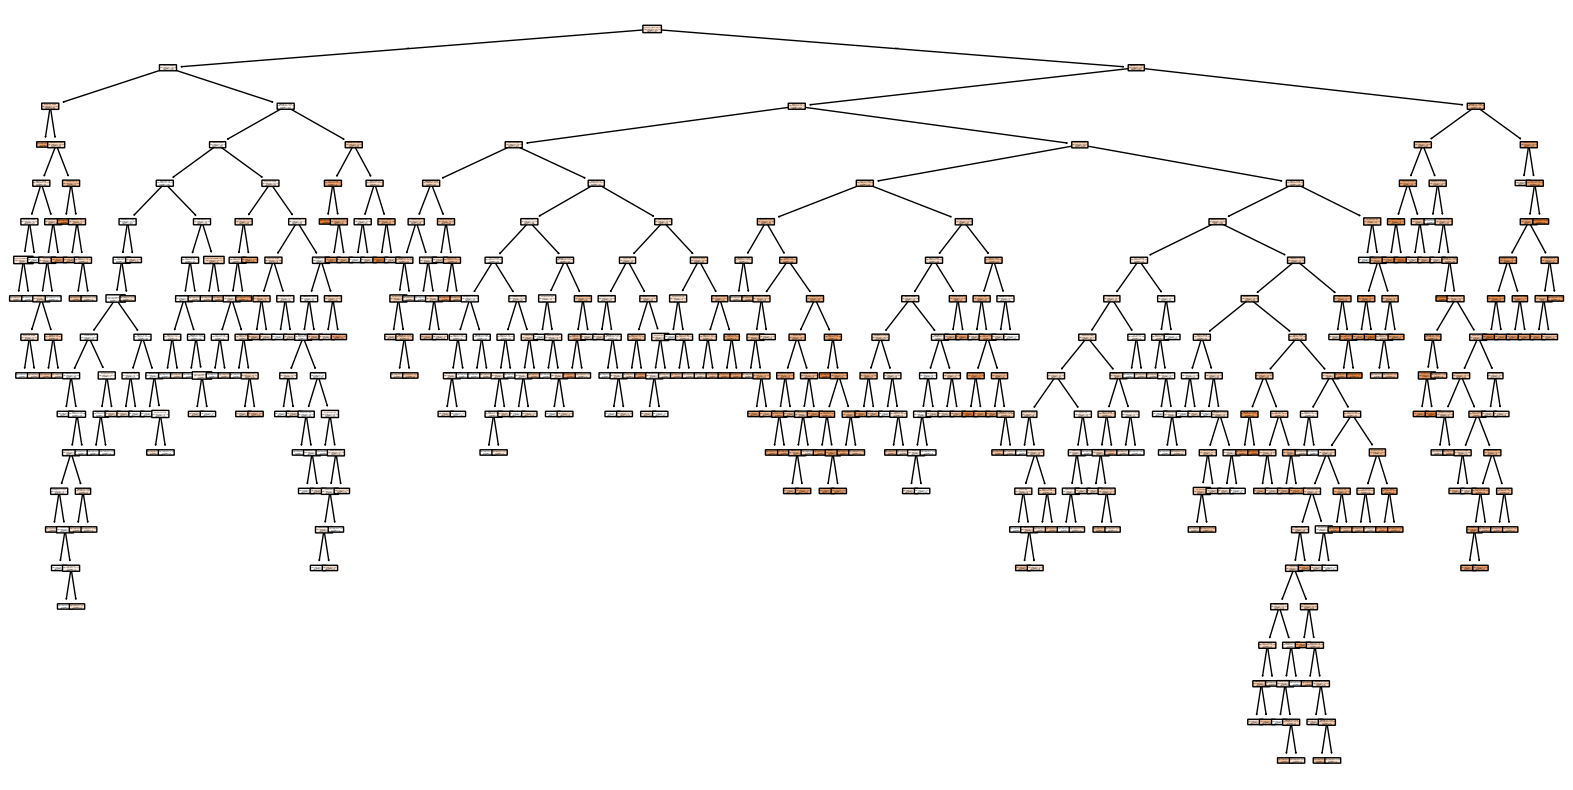

age: 0.14841543619805125
trestbps: 0.07141688719762006
chol: 0.13449855934654434
fbs: 0.008805078526308437
restecg: 0.0270908225203353
thalch: 0.11114078954917593
exang: 0.026471831649500295
oldpeak: 0.19051920838100114
slope: 0.020990094140557244
thal: 0.03892829307450473
sex_Male: 0.03045102030649667
cp_atypical angina: 0.002042397002351476
cp_non-anginal pain: 0.0006236311941061339
cp_typical angina: 0.1886059509134472


In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree structure
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

# Print feature importance
feature_importances = dt_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")
